# Part A (Analysis of the Given Dataset)

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard 
6.	'Parch':  parents/children aboard 
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv)

\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.







## 1. Provide an overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models. This section should be written after completing Part A. 

**Write Here**
In the Titanic dataset we have got 1309 rows and 12 columns. Some of the columns values are Categorical and some are Numeric data. Name column has String data. Sex column have categorical values(Male, Female). Sibsp is total count of the Siblings and Spouse. Parch is total count of Parent and Children. 
There are ticket number, Cabin Number etc columns available. 
Then In the preprocessing sector, We have checked how many missing values are available in our dataset.For this we have used isnull() function.But it is difficult to see all the missing values from huge number of data. so we have used heatmap() function to visualise the missing values properly. By doing this we can see which column is having NAN values. Most of the NAN values are present in Cabin column.In order to handle it we filled the NULL values in (Age, Fare)column using Mean() and Median(). We used fillna() for Cabin and Embarked columns. 
we used 2 Machine Learning models. Linear and logistic Regression. 

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable (hints: heatmap, groupby, etc) with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need). Note, we will be watching for copy-paste here.

### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [489]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [490]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [491]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
gender_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

In [492]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test Data:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender Data:'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [493]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [494]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [495]:
#Show all column names
# Code Here
print(df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [496]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [497]:
# Count rows and coulums
# Code Here
rows = len(df. axes[0])
columns = len(df. axes[1])
print('Rows: ',rows)
print('Columns: ',columns)

Rows:  1309
Columns:  12


In [498]:
# Total cells in the dataset
# Code Here
print(df.size)

15708


### 2.2 Data Cleaning









#### Identifying duplicate values


In [499]:
# Code Here 
duplicateValues= df[df.duplicated()]
print(duplicateValues)


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


#### Identifying missing values


In [500]:
# Find the amount of missing values in each column
# Code Here 

MV = df.isna().sum() 
print(MV)


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [501]:
# Calculating the percentage of missing values:
percent_missing = MV * 100 / len(df)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

#### Visualisation of missing data


     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False   

      Fare  Cabin  Embarked

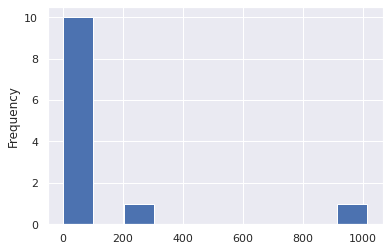

In [502]:
# Detect missing values
MV1  = df.isna() 

print(MV1)
# Visualisation

df.isna().sum().plot.hist()
plt.show() 



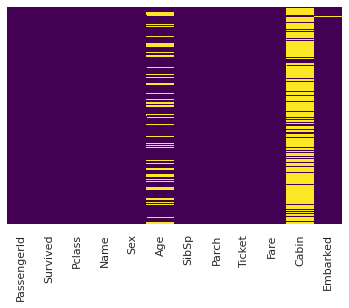

In [503]:
sns.heatmap(MV1, yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




In [504]:
# Code Here (Add as many cells as you need)
df2 = df.Cabin.fillna('', inplace =True)
df3 = df.Embarked.fillna('', inplace= True)

df4= df.Age.fillna(df.Age.mean(),inplace =True)
df5= df.Fare.fillna(df.Fare.median(),inplace = True)

print(df.isna().sum())

print(df)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle

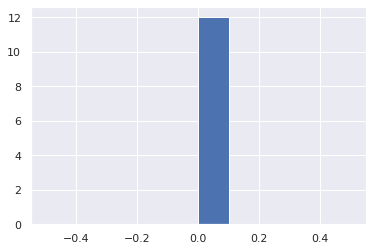

In [505]:
plt.hist(df.isna().sum())
plt.show()


 ##### Discuss your findings
Here we dealt with missing values. We filled the Null values of Cabin and Embarked column with empty character (using fillna function). We got the sum of missing values (using isna and sum function) and showed it as histogram plot.


### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'. 

In [506]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added

Titanic = pd.get_dummies(df['Sex'])

Titanic = Titanic.drop(['female'], axis = 1)

Titanic = pd.concat(( df,Titanic), axis=1)

T1 = Titanic.drop(['Sex'], axis=1).rename(columns = {"male" : "SexNo"}) 
T1                                   

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number,SexNo
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",29.881138,0,0,A.5. 3236,8.0500,,S,0,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",39.000000,0,0,PC 17758,108.9000,C105,C,1,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",38.500000,0,0,SOTON/O.Q. 3101262,7.2500,,S,0,1
416,1308,0,3,"Ware, Mr. Frederick",29.881138,0,0,359309,8.0500,,S,0,1


#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [507]:
# Correlation table including the new column 'SexNo'
#'Survived','Pclass','Age','SibSp','Parch','Fare','Sex_Number','SexNo'
correlation = T1.corr()
# correlation=T1.groupby('Age')[['Survived','Pclass','PassengerId','SibSp','Parch','Fare','Sex_Number','SexNo']].corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Number,SexNo
PassengerId,1.000000,-0.020370,-0.038354,0.025731,-0.055224,0.008942,0.031128,-0.013406,0.013406
Survived,-0.020370,1.000000,-0.264710,-0.048483,0.002370,0.108919,0.233773,0.688371,-0.688371
Pclass,-0.038354,-0.264710,1.000000,-0.366371,0.060832,0.018322,-0.558683,-0.124617,0.124617
Age,0.025731,-0.048483,-0.366371,1.000000,-0.190747,-0.130872,0.170851,-0.057397,0.057397
SibSp,-0.055224,0.002370,0.060832,-0.190747,1.000000,0.373587,0.160349,0.109609,-0.109609
Parch,0.008942,0.108919,0.018322,-0.130872,0.373587,1.000000,0.221635,0.213125,-0.213125
Fare,0.031128,0.233773,-0.558683,0.170851,0.160349,0.221635,1.000000,0.185681,-0.185681
Sex_Number,-0.013406,0.688371,-0.124617,-0.057397,0.109609,0.213125,0.185681,1.000000,-1.000000
SexNo,0.013406,-0.688371,0.124617,0.057397,-0.109609,-0.213125,-0.185681,-1.000000,1.000000


In [508]:
T1.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Number,SexNo
PassengerId,1.000000,-0.020370,-0.038354,0.025731,-0.055224,0.008942,0.031128,-0.013406,0.013406
Survived,-0.020370,1.000000,-0.264710,-0.048483,0.002370,0.108919,0.233773,0.688371,-0.688371
Pclass,-0.038354,-0.264710,1.000000,-0.366371,0.060832,0.018322,-0.558683,-0.124617,0.124617
Age,0.025731,-0.048483,-0.366371,1.000000,-0.190747,-0.130872,0.170851,-0.057397,0.057397
SibSp,-0.055224,0.002370,0.060832,-0.190747,1.000000,0.373587,0.160349,0.109609,-0.109609
Parch,0.008942,0.108919,0.018322,-0.130872,0.373587,1.000000,0.221635,0.213125,-0.213125
Fare,0.031128,0.233773,-0.558683,0.170851,0.160349,0.221635,1.000000,0.185681,-0.185681
Sex_Number,-0.013406,0.688371,-0.124617,-0.057397,0.109609,0.213125,0.185681,1.000000,-1.000000
SexNo,0.013406,-0.688371,0.124617,0.057397,-0.109609,-0.213125,-0.185681,-1.000000,1.000000


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

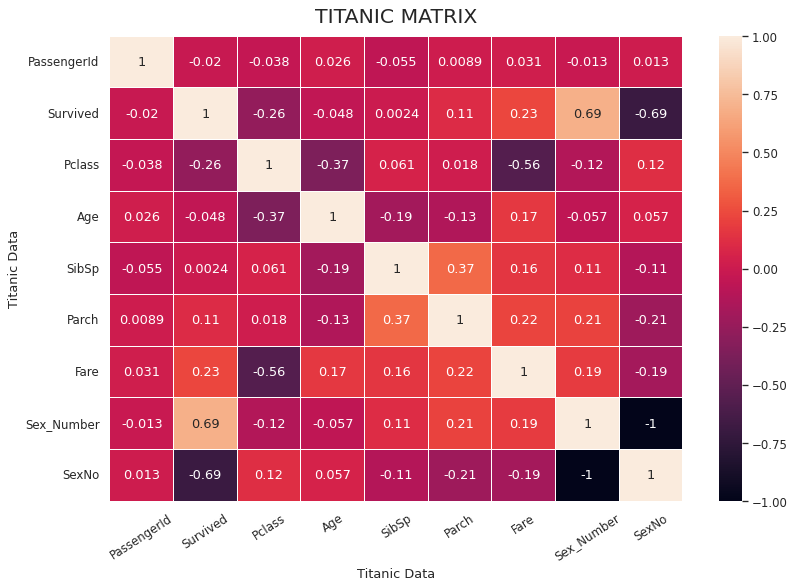

In [509]:
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Titanic Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.1)? Write in your own words in this cell.

Write below:

We created the corelation matrix (using corr function). In that matrix, the i-j position defines the correlation between the ith and jth parameter of the given data-set. We ploted Heatmap by which we visualize the value of the matrix with colors.



#### 2.3.2 Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



##### 2.3.2.1 Sex Proportion

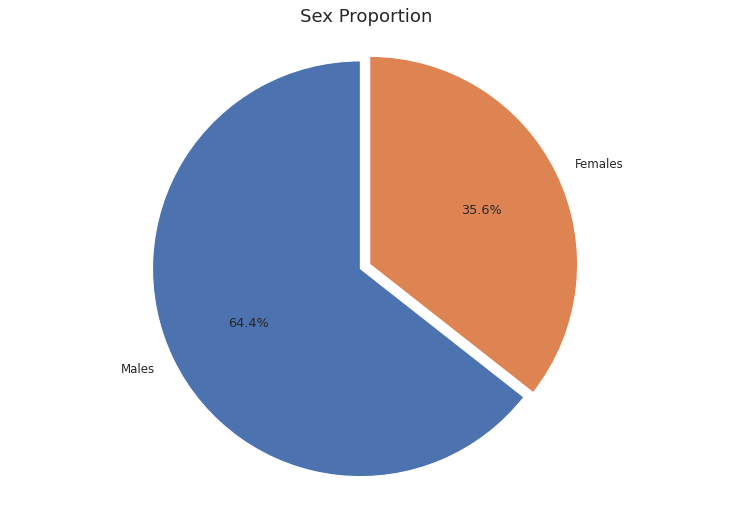

In [510]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.1)? Write in your own words in this cell.

Write below: 

From this pie chart we understand/find that the percentage of Male and Female in the Sex column. 


##### 2.3.2.2 Age comparision of the people who survived and those who died

In [511]:
# How many people survived ('Survived' == 0)
survived_data=df.Survived.value_counts().to_frame()
survived_data  

,Survived
0,815
1,494


In [512]:
pd.pivot_table(df, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare']) 

,Fare,Parch,Pclass,SibSp
Survived,,,,
0,23.867560,0.311656,2.467485,0.496933
1,48.811497,0.506073,2.010121,0.502024


In [513]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Sex', 'Survived']).Age.agg([len,min, max,'mean', 'median'])

len   min   max       mean     median
Sex    Survived                                       
female 0          81  2.00  57.0  26.061473  29.000000
       1         385  0.17  76.0  29.481401  29.881138
male   0         734  0.33  74.0  30.842401  29.881138
       1         109  0.42  80.0  27.658424  29.881138

In [514]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

In [515]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

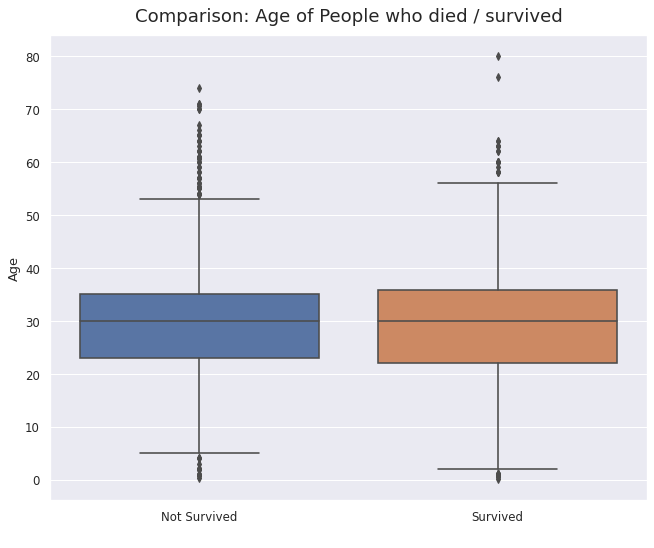

In [516]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.2)? Write in your own words in this cell.

Write below:

Here we found how many people survived and not survived from Survived column of the data-set. Moreover we found the length, minimum value ,maximum value, mean value,median value of the survived column with respect to Sex column. We filled all the null value. Lastly we plotted box plot where X-axis was Survived and Not Survived Y-axis was Age. Here we saw a lots of outliers in Not Survived box plot than the Survived box plot.



##### 2.3.2.3 The barplot compares the survival 

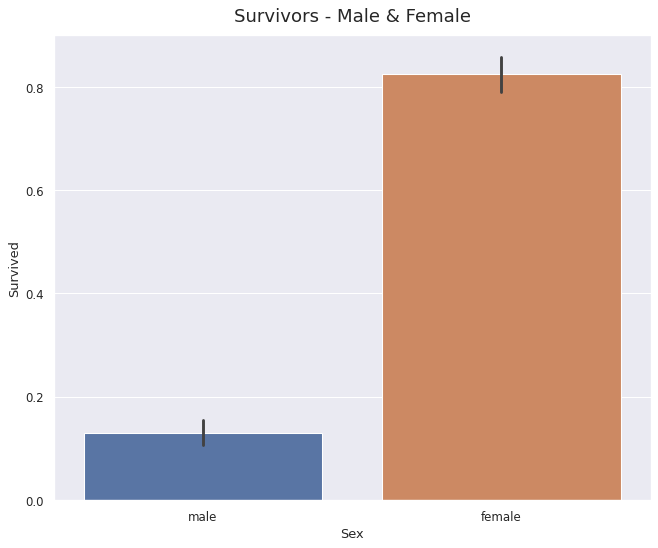

In [517]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.3)? Write in your own words in this cell.

Write below:

Here we plotted barplot with respect to Sex and Survived column.From this barplot we saw the difference and the amount of Male or Female who survived and not survived.

Here figure function have been used to determine the size of figure in inches. dpi determines the size of elements in the figure. For male and female survivors here used the dpi 77. 
From the above barplot we can say that Females have a higher survival rate than males.

##### 2.3.2.4 Comparison: Survivors - Male & Female

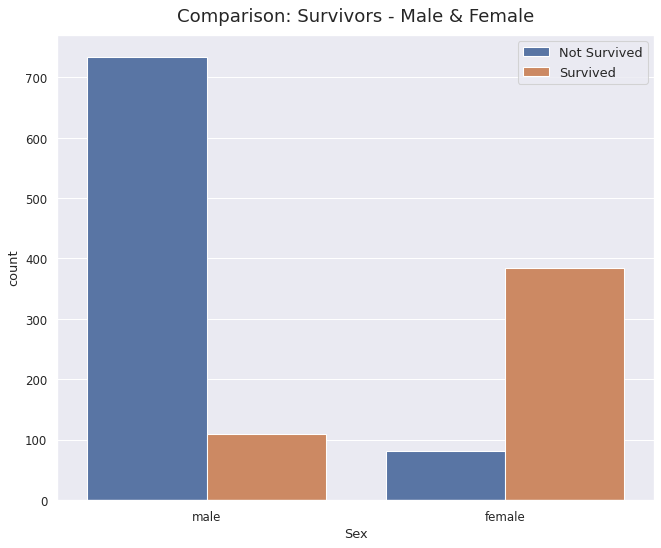

In [518]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.4)? Write in your own words in this cell.

Write below:

Here we plotted barplot with respect to Sex and Survived column.From this barplot we saw the difference and the amount of Male or Female who survived and not survived. Here we saw that the large number of male was not survived. On the other hand the large number of female was survived. Here we used legend function for understanding the color of the graph.

In the above graph, Legend() is used to describe each of the part of a graph.We can see about what amount of data is representing which kind of data.For labeling the values legend() has been used. Countplot used and Here x axis is actually having the "sex" column. And the parameter hue is divided based on the Sex column. 
In this graph, the amount of male survivals is lower than the amount of female survivals.On the other hand, the amount of male not survivals is huge than female. We can easily see this by using barplots. 

In [519]:
# Find percentage of women who survived
res=(df['Survived'][df['Sex']=='female'])
# print(res.count())
c1=res.value_counts()[1]
# print(c0)
percentage=(c1/res.count())
print("Percentage of women who survived was "'%.2f'  %(percentage*100),"%")

Percentage of women who survived was 82.62 %


In [520]:
Titanic = pd.get_dummies(df['Sex'])
Titanic

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [521]:
# Find percentage of men who survived 
res=(df['Survived'][df['Sex']=='male'])
# print(res.count())
c1=res.value_counts()[1]
# print(c0)
percentage=(c1/res.count())
print("Percentage of women who survived was "'%.2f'  %(percentage*100),"%")

Percentage of women who survived was 12.93 %


##### 2.3.2.5 Compares the chance of survival for each ticket class

In [522]:
df['Pclass'].value_counts() 

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [523]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         186
2      0         160
       1         117
3      0         518
       1         191

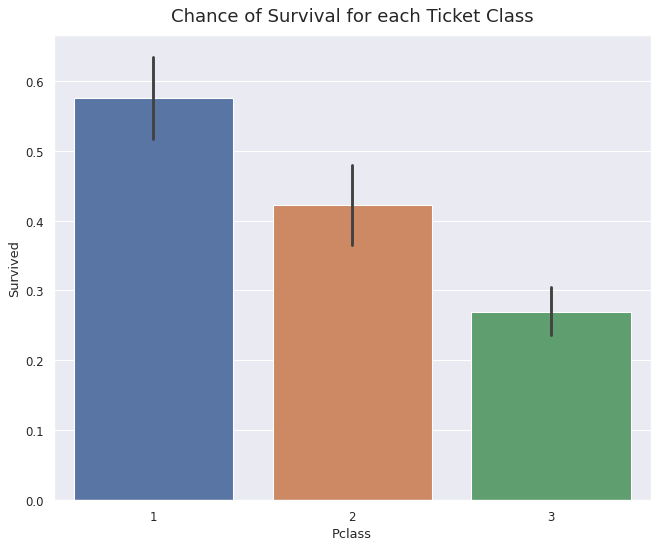

In [524]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

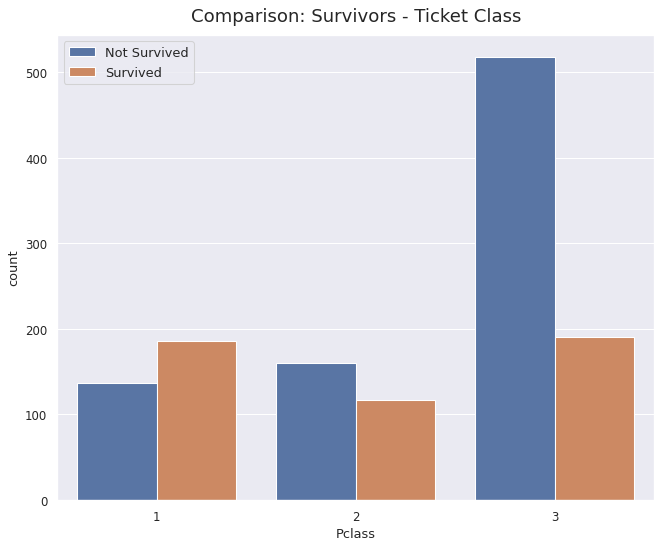

In [525]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.5)? Write in your own words in this cell.

Write below:

We got the count values of the 3 classes (1,2,3) from the Pclass column. We got the
length of Pclass with respect to Survived column. We plotted a barplot by which we
saw the chance of survival for each ticket. Here 1st class had the more chance to
survive than 2nd and 3rd class. Last bar plot  showed the comparison between 
survivors and the ticket class. Here we saw that the 1st class people more survived
than the other classes.

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [526]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  25.249713
       1        1       141  14.00  76.0  36.721224
                2       100   0.92  60.0  27.060634
                3       144   0.17  63.0  24.073496
male   0        1       134   6.00  71.0  40.543031
                2       154   2.00  70.0  32.189562
                3       446   0.33  74.0  27.462699
       1        1        45   0.92  80.0  35.540571
                2        17   0.67  62.0  17.652487
                3        47   0.42  45.0  23.730856

In [527]:
df['Parch'].value_counts().to_frame()

,Parch
0,1002
1,170
2,113
3,8
5,6
4,6
6,2
9,2


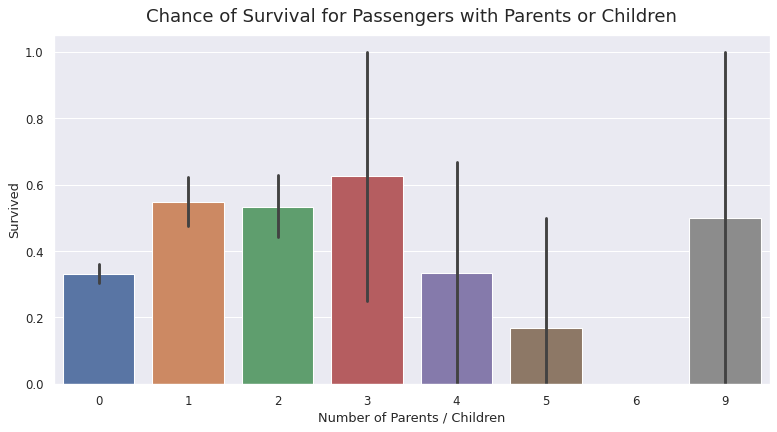

In [528]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

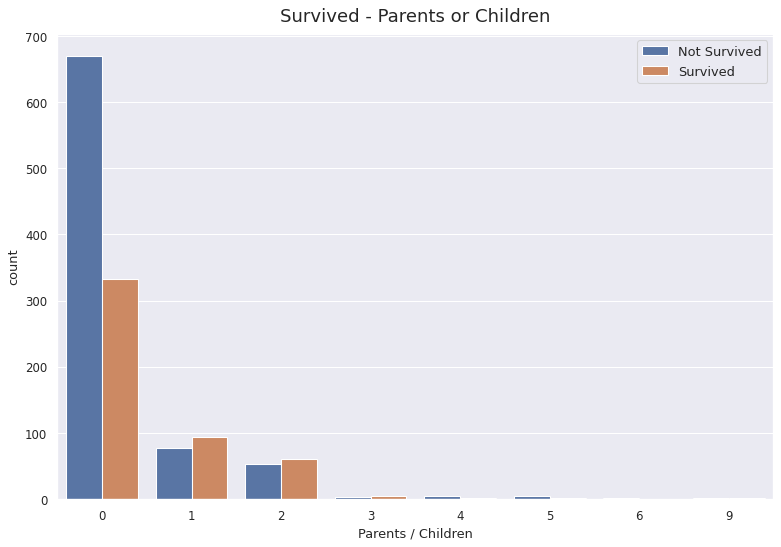

In [529]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children') 
plt.show()

In [530]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len        min        max
Parch Survived                           
0     0         670  11.000000  74.000000
      1         332   5.000000  80.000000
1     0          77   0.750000  70.000000
      1          93   0.420000  64.000000
2     0          53   0.330000  58.000000
      1          60   0.170000  64.000000
3     0           3  16.000000  61.000000
      1           5  24.000000  54.000000
4     0           4  29.000000  64.000000
      1           2  29.881138  60.000000
5     0           5  39.000000  41.000000
      1           1  38.000000  38.000000
6     0           2  40.000000  43.000000
9     0           1  29.881138  29.881138
      1           1  29.881138  29.881138

 What do you undersend/find from the analysis above (section 2.3.2.6)? Write in your own words in this cell.

Write below:

We found the length, minimum value ,maximum value and mean value of the survived and Pclass column with respect to Sex column. We also found the count value of Parch Column. We plotted a bar plot by which we understood that the chance of survival for passengers with parents or children.Last bar plot showed the number of parents or childern who survived and not survived. We found the length, minimum value ,maximum value of the Parch column with respect to survived column.

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [531]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [532]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean']) 

len       mean
SibSp Survived                
0     0         593  31.162045
      1         298  29.724267
1     0         153  33.035116
      1         166  28.959347
2     0          23  24.723627
      1          19  24.165443
3     0          15  16.168303
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  27.958495
      1           1  29.881138

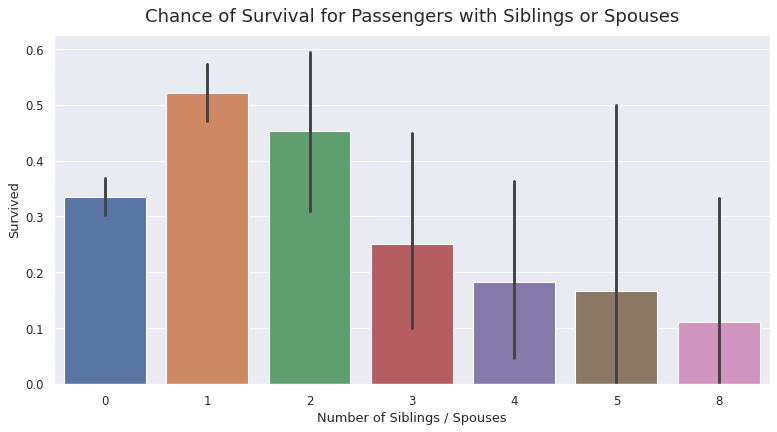

In [533]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show() 

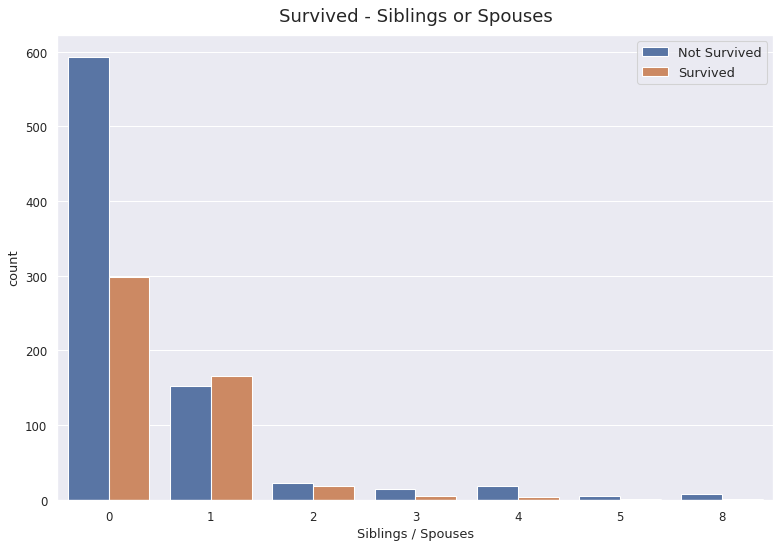

In [534]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [535]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len        min        max       mean
SibSp Survived                                      
0     0         593   0.330000  74.000000  31.162045
      1         298   0.420000  80.000000  29.724267
1     0         153   0.750000  70.000000  33.035116
      1         166   0.170000  76.000000  28.959347
2     0          23   9.000000  44.000000  24.723627
      1          19   0.750000  59.000000  24.165443
3     0          15   2.000000  31.000000  16.168303
      1           5  23.000000  33.000000  27.600000
4     0          18   1.000000  16.000000   7.222222
      1           4   3.000000  38.000000  15.750000
5     0           5   1.000000  16.000000  10.200000
      1           1  10.000000  10.000000  10.000000
8     0           8  14.500000  29.881138  27.958495
      1           1  29.881138  29.881138  29.881138

 What do you undersend/find from the analysis above (section 2.3.2.7)? Write in your own words in this cell.

Write below:

We found the length and mean value of the sibsp column with respect to Survived 
column. We also found the count value of Sibsp Column. We plotted a bar plot by 
which we understood that the chance of survival for passengers with siblings or spouses.
Last bar plot showed the number of siblings or spouses 
who survived and not survived. We found the length, minimum value, maximum value
of the sibsp column with respect to survived column.

##### 2.3.2.8 Chance of Survival by Port of Embarkation

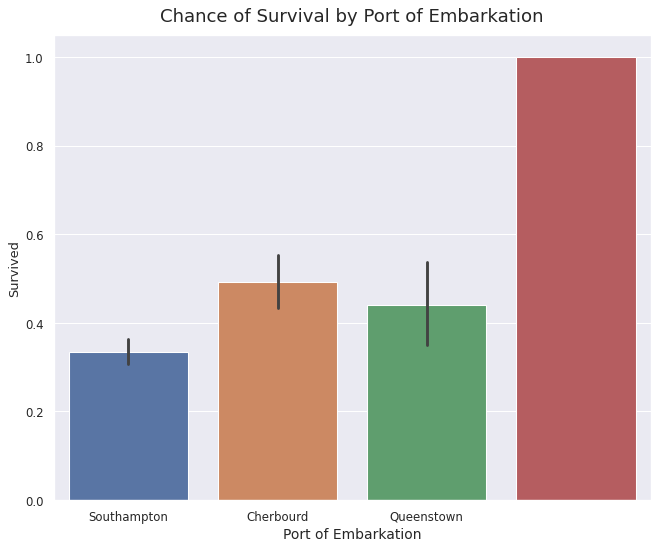

In [536]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

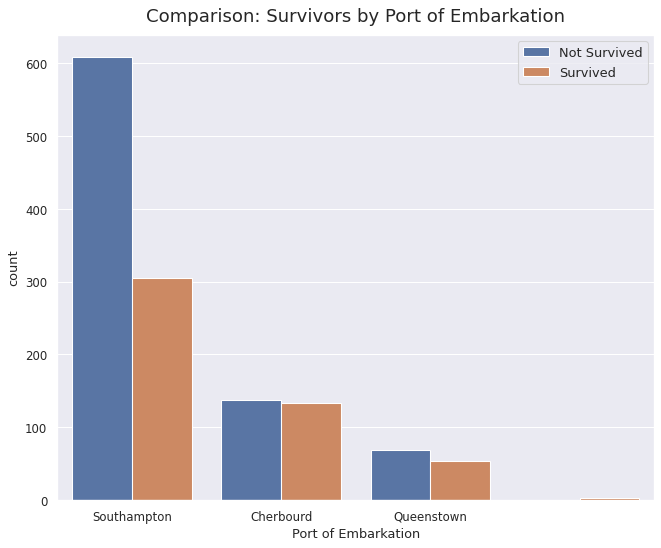

In [537]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.8)? Write in your own words in this cell.

Write below:

Here we plotted bar plot by which we saw the chance of survival by the port of Embarkation. Here in x-axis was port of Embarkment and y-axis was survival rate. In the last bar plot we saw the amount of the people survived and not survived from the port of Embarkment. Here we saw that the survived and not survived value of southampton is more than others.


##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

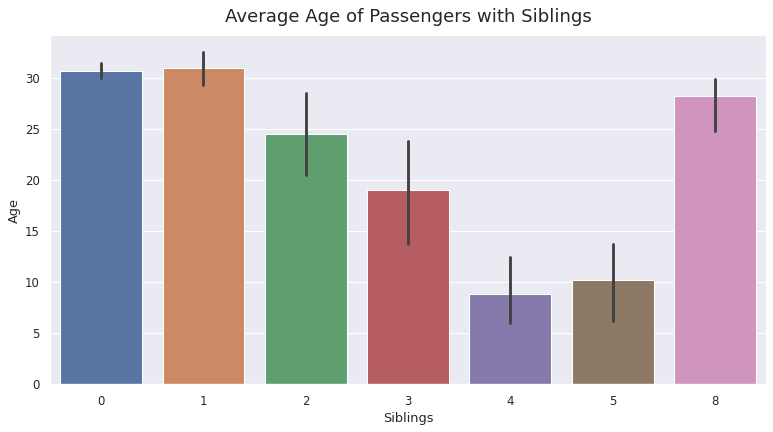

In [538]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

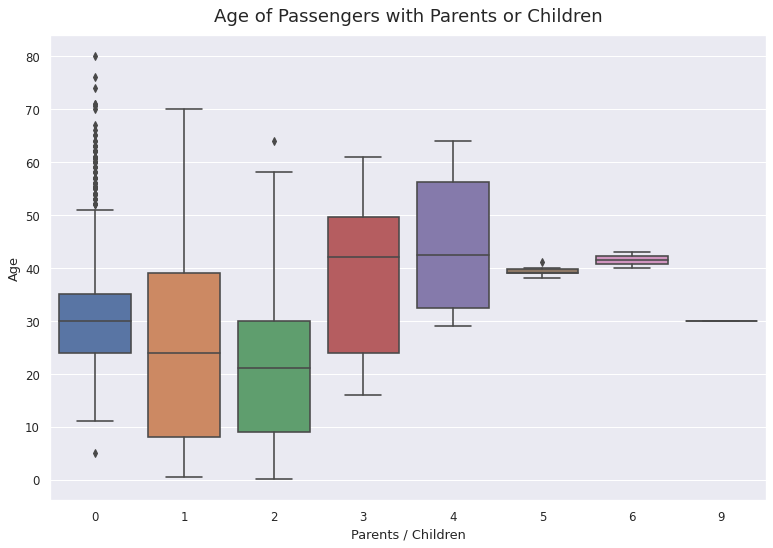

In [539]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

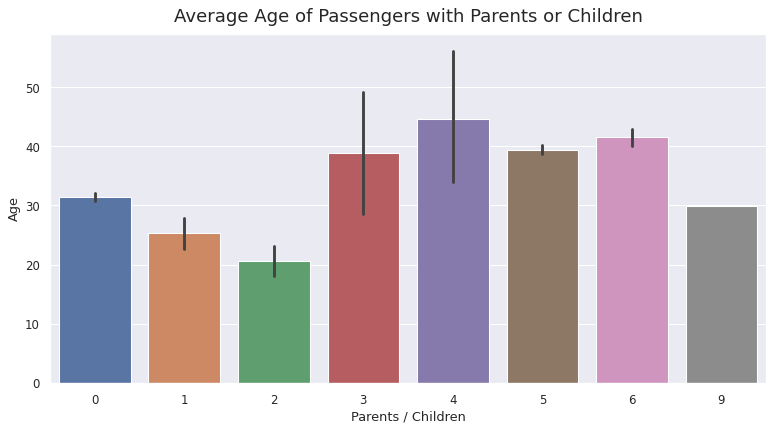

In [540]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show() 

 What do you undersend/find from the analysis above (section 2.3.2.9)? Write in your own words in this cell.

Write below:

Here we plotted bar plot by which we saw the Average Age of passengers with 
siblings. Here in x-axis representing siblings and y-axis is age.Poeple who had 1 sibling was the highest average of age than others.secondly we plotted a box plot by which we found the age of passengers with parents or children. Here x-axis was parents or children and y-axis was the age. From this plot we saw that people who had 0 sibling had the many outliers. The last bar plot was about the average age of passengers with parents or children.Here in x-axis was parents or children
and y-axis was age. From this graph the parents who have 4 family members had the highest age from the others.

##### 2.3.2.10 Age of Passengers for each Ticket Class

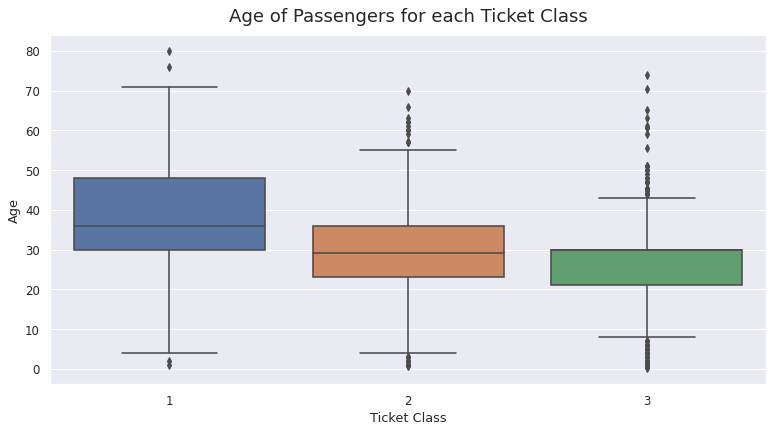

In [541]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show() 

 What do you undersend/find from the analysis above (section 2.3.2.10)? Write in your own words in this cell.

Write below:

Here we plotted bar plot by which we saw the age of passengers for each ticket class. Here in x-axis was ticket class and y-axis was age. From this graph we saw that the people who journeyed through 3rd class had the highest outliers.

##### 2.3.2.11 Comparing multiple columns

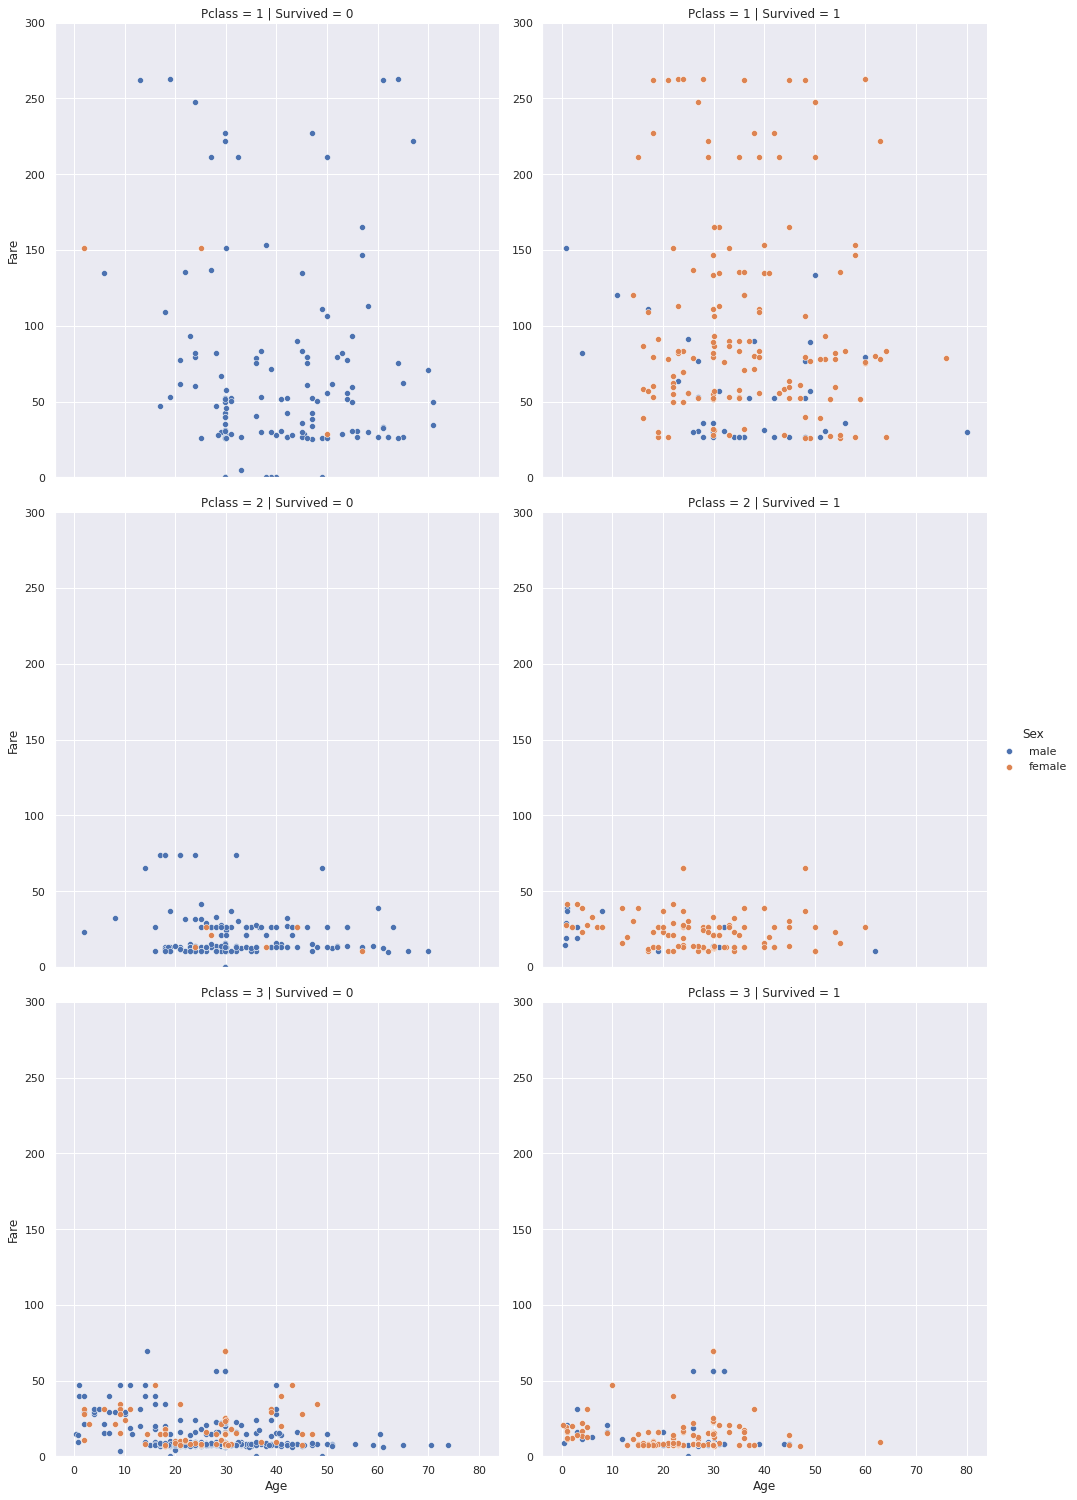

In [542]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend() 
# g.set_titles(col_template='', row_template='')
plt.show() 

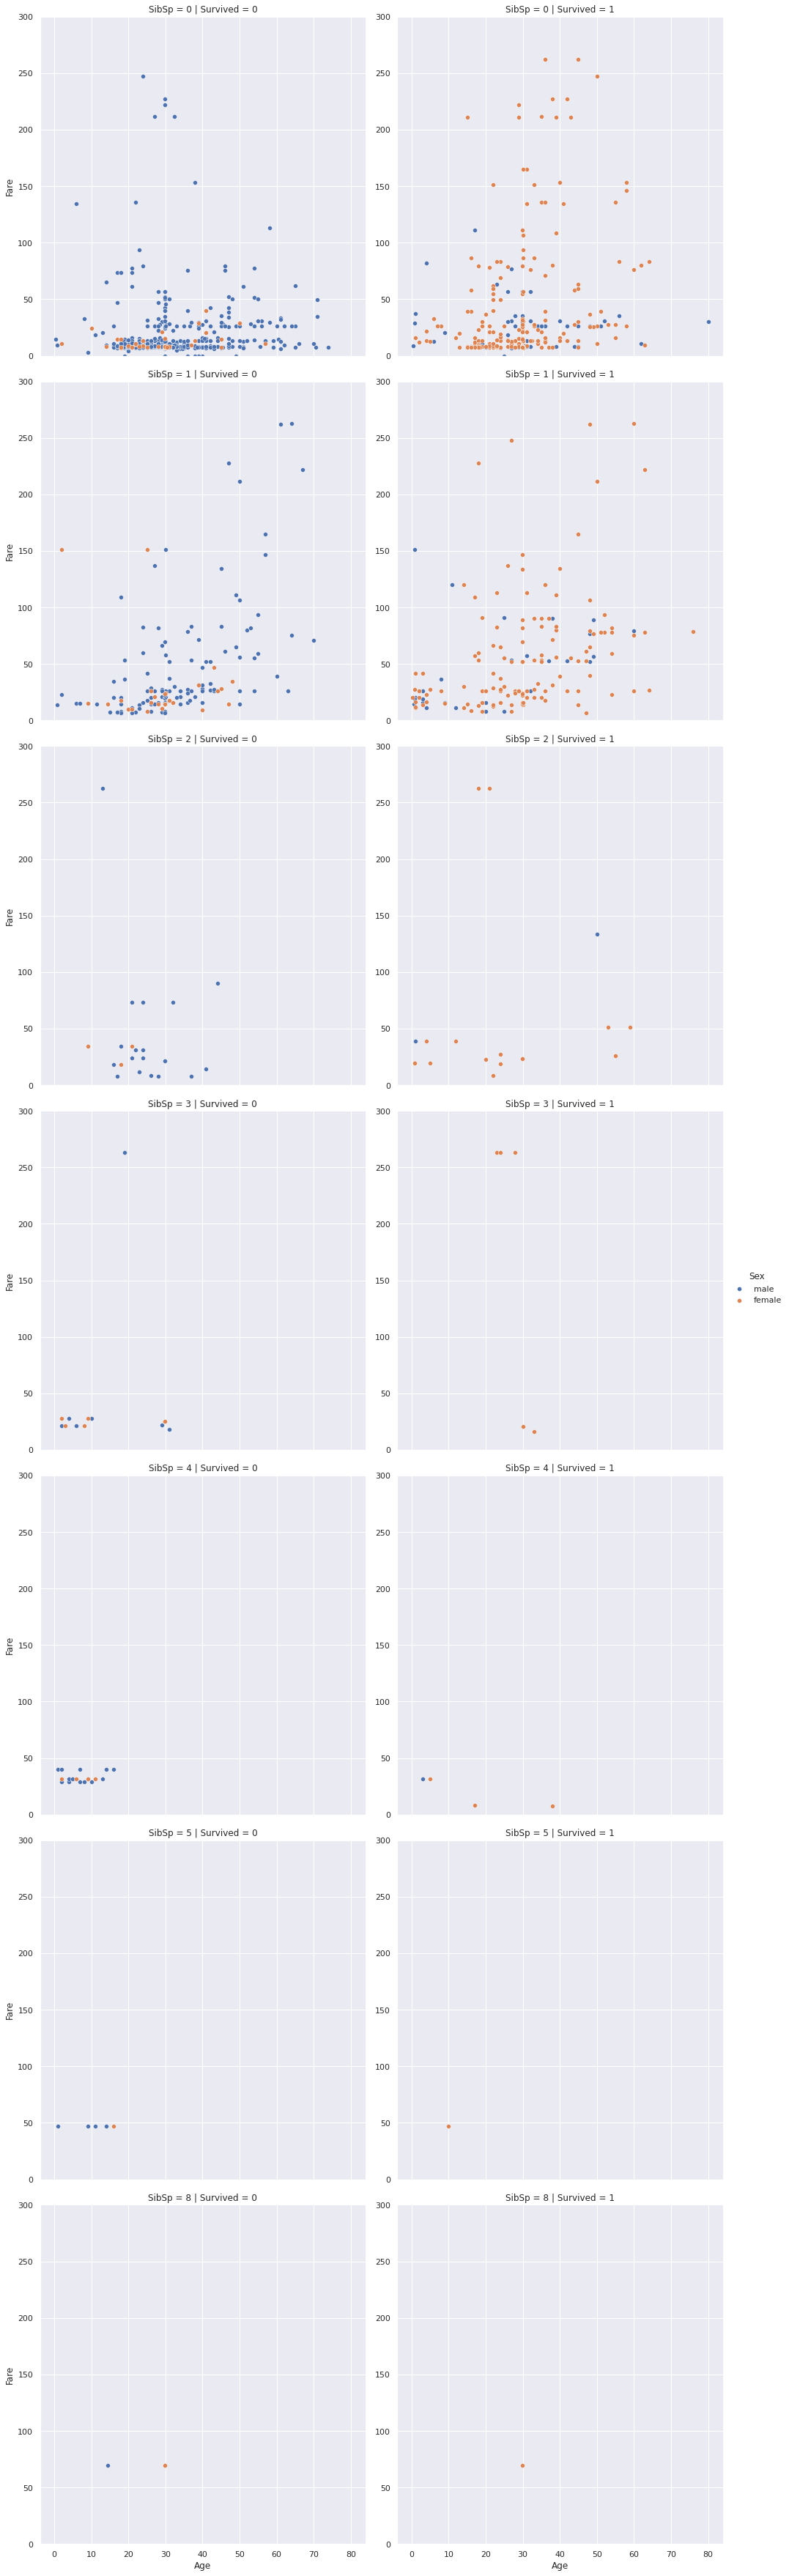

In [543]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show() 

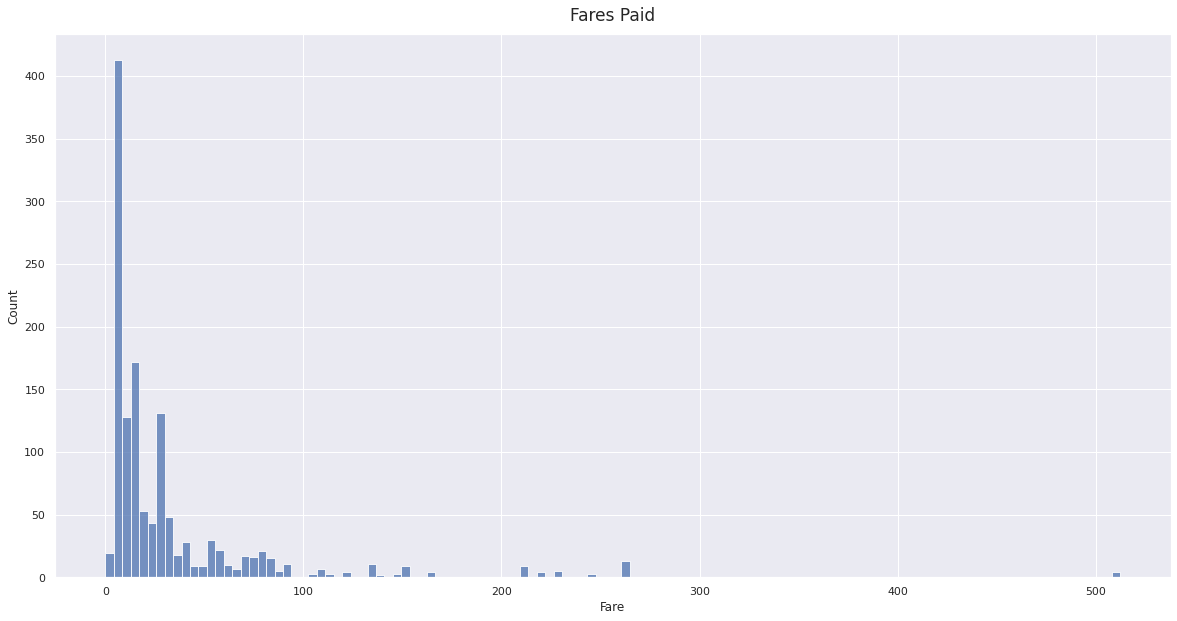

In [544]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

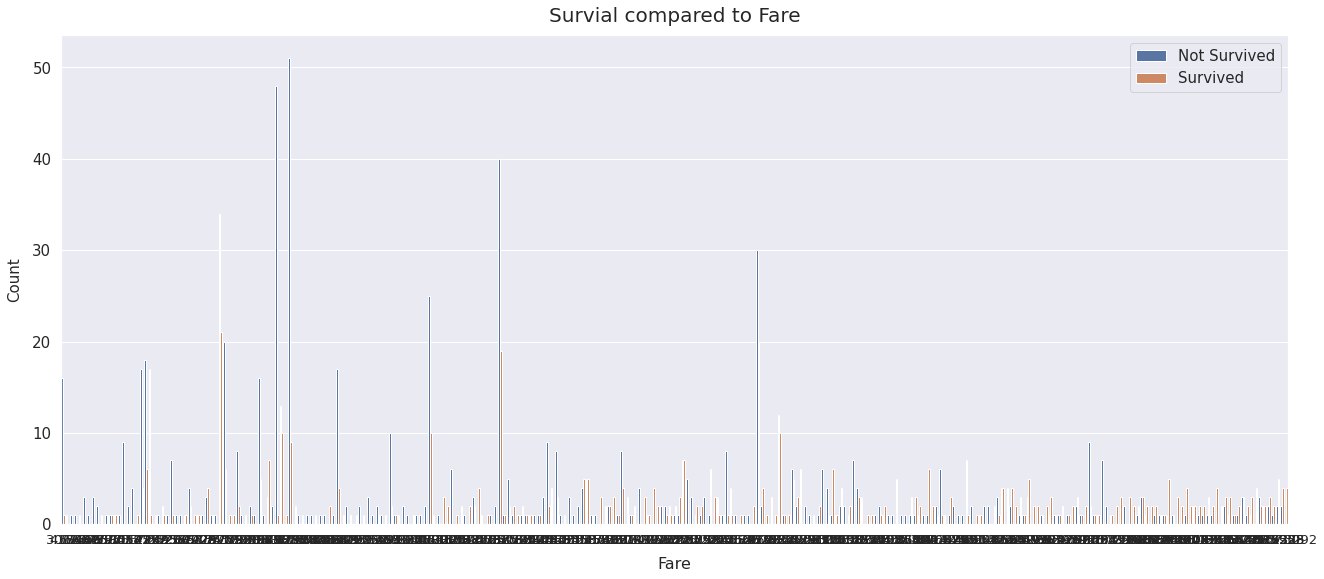

In [545]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.11)? Write in your own words in this cell.

Write below:

Firstly we plotted scatter plot using seaborn by which we can see
the comparison of pclass, age, sex and survivors. Moreover, 
the plot showed us the survived and not survived with respect to
pclass.We saw the more varience in pclass=1 and survived=1 than 
others. Secondly, we plotted scatter plot using seaborn by which we can see
the comparison of parch, age, sex and survivors. Moreover, the plot showed us the survived and not survived with respect to pclass.We saw the more varience in sibsp=1 and survived=1 than  others. Thirdly we plotted histoplot on the passengers fare paid.
Forthly, we plotted histoplot on survived or not survived with 
respect to fare paid.


## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

For encoding categorical variables you can use pandas (get_dummies).

Convert categorical variable into dummy/indicator variables.

Learn More:


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

**Examples**


In [546]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [547]:
train1 = train_data.copy()


train1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [548]:
data1 = train1.copy()

data1 = pd.get_dummies(data1)

data1.head() 


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Now use the given dataset and perform the data preprocessing steps:**

In [549]:
# Code Here (Add as many cells as you need)
data1.drop_duplicates()
data1.Age.fillna(data1.Age.mean(), inplace =True)

### **Write Here**

 What do you undersend/find from the analysis above (section 3)? Write in your own words in this cell.

We set the train data and copy it another attribute dropped some column from the train data. Moreover, we created dummies (using get_dummies function) and
keep it another attribute. Lastly, we dropped the duplicate values (using drop_duplicates function) and fill the null values (using fillna function) of Age column with the mean
of the age column. 


## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

### 4.1 Use Logistic regression to build your ML model for the Titanic dataset.

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy.


In [550]:
# # Code Here (Add as many cells as you need)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# data1
X=data1.drop('Survived', axis=1)
Y=data1['Survived']
r1=np.array(X)
r2=np.array(Y)
# X2 = r1.reshape(-1, 1)
# Y2 = r2.reshape(-1,1)
# print(X1)
# print(Y2)
rL= LogisticRegression() 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size
= 1/3, random_state = 0)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 20)
rL.fit(X_train, Y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [551]:
Y_pred = rL.predict(X_test)

In [552]:
# r2_score1 = rL.score(X_test,Y_test)
# print(r2_score1*100,'%')
from sklearn import metrics
r2a = metrics.r2_score(Y_test, Y_pred)
print(r2a*100,'%')

10.81081081081081 %


In [553]:
regressor1 = LogisticRegression(C=1.0)
regressor1.fit(X_train.round(), Y_train.round())
from sklearn import metrics
Y_Pred = regressor1.predict(X_test)
r2b = metrics.r2_score(Y_test, Y_Pred)
print(r2b*100,'%')


12.249346120313865 %


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Write Here**

What do you undersend this above (section 4.1)? Write in your own words in this cell.

We have applied Logistic Regression. And got the R2_score which is 0.10.
second iteration we used parameter (c = 1.0). After using the parameter we got r2_score 0.12. which is better than previous. 

### 4.2 First analyse the 'Advertising dataset' as like you have observed in Titanic dataset. Then, use Linear Regression to build your ML model for the Advertising dataset. 

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy. 


In [554]:
#Linear Regression Model
# Code Here (Add as many cells as you need)
adv=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/advertising.csv')
# adv
X=adv.drop("Sales", axis='columns')
Y=adv['Sales']
# X1 = pd.get_dummies(X)
# Y1 = pd.get_dummies(Y)
print(X)
print(Y)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size
= 1/3, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, Y_train) 


        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


LinearRegression()

In [555]:
y_pred = regressor.predict(X_test)

In [556]:
#Measuring Linear regression Accuracy
from sklearn import metrics
r2 = metrics.r2_score(Y_test, y_pred)
print(r2*100,'%')

86.71668543617773 %


In [557]:
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [558]:
#Logistic Regression  
# Code Here (Add as many cells as you need)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# data1
X=adv.drop('Sales', axis=1)
Y=adv['Sales']
rr=np.array(X)
rq=np.array(Y)
rL1= LogisticRegression() 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size
= 1/3, random_state = 0)
rL1.fit(X_train.round(), Y_train.round())


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [559]:
Y_pred = rL1.predict(X_test)

In [560]:
from sklearn import metrics
r3 = metrics.r2_score(Y_test, Y_pred)
print(r2*100,'%')

86.71668543617773 %


**Write Here**

What do you undersend this above (section 4.2)? Write in your own words in this cell.

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models (for both the dataset, provide seperate comparison). Add as many cells as you need.

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

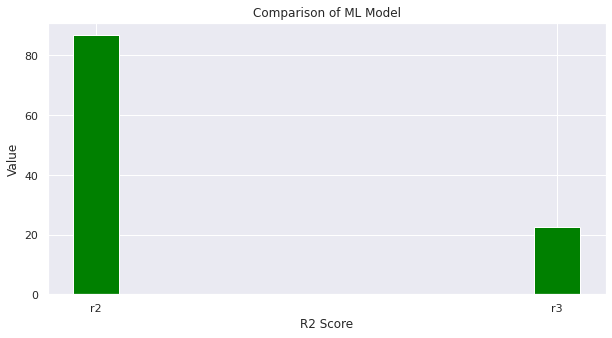

In [561]:
# Code Here (Add as many cells as you need)
data = {'r2':r2*100, 'r3':r3*100}
r2s = list(data.keys())
r3s = list(data.values())
fig = plt.figure(figsize = (10,5))
plt.bar(r2s, r3s, color ='green',width = 0.1)
plt.xlabel("R2 Score")
plt.ylabel("Value")
plt.title("Comparison of ML Model")
plt.show()


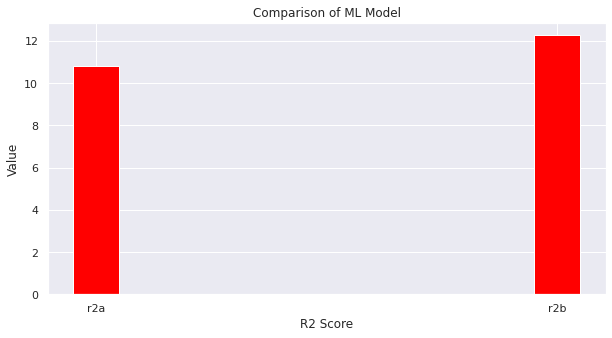

In [562]:
# R2 Score Plotting comparison for titanic
d = {'r2a':r2a*100, 'r2b':r2b*100}
r2s1 = list(d.keys())
r3s2 = list(d.values())
fig = plt.figure(figsize = (10,5))
plt.bar(r2s1, r3s2, color ='red',width = 0.1)
plt.xlabel("R2 Score")
plt.ylabel("Value")
plt.title("Comparison of ML Model")
plt.show()

### **Write Here**
We have applied two Machine Learning Models. Linear regression and Logistic Regression. In question (4.2), we applied LInear and Logistic Model. The r2_score we got from Linear Regression is 87%. On the other hand From Logistic Regression we got only 22% r2_score. Here, Linear is performing better than logistic. Linear regression is utilized for regression tasks, while logistic regression helps accomplish classification tasks. We use logistic models for classification data values. 

# Part B (Analysis of the Assignment dataset you have collected (Choose One dataset))



## 1. Provide an overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models. 

### **Write Here**
The Joint Malnutrition(JME) is a dataset of country estimates which is filled with the collection of national data. Which contains information on Child Malnutrition.In this dataset, there are 1035 rows and 36 columns. We found whole information using info() function. Three(Object, integer, float) types of data are available in our dataset. In the preprocessing phase we dealed with null values. where we replaced null values using mean(), median() functions. Found some extra columns, after analysing we realised those columns wont help us to run and explore our model so we dropped those avoidable columns by using drop() function. 


## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need)

### 2.1 Load, View Data and Show Analysis on Rows and Columns 

In this section, We have choosed our dataset. Our dataset name is on "Joint child Malnutrition Estimates(JME)_Country_Estimates". Our dataset is given below. Our dataset have 1035 rows and 35 columns.

In [563]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [564]:
# Code Here (Add as many cells as you need)
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/JME_Country_Estimates_May_2022.csv')
df


,ISO code,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,UNICEF Sub-Region,WHO Region,...,Stunting,Stunting Footnote,WAZ Survey Sample (N),Underweight,Underweight Footnote,Fieldwork period,Report Author,Source,Short Source,U5 Population ('000s)
0,AFG,AFGHANISTAN,1997,1997,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,53.2,cw 10,4846.0,44.9,c,"January,1997-May,1997",CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.876953
1,AFG,AFGHANISTAN,2004,2004,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,59.3,w 11,946.0,32.9,w 11,"May,2004-June,2004","Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353027
2,AFG,AFGHANISTAN,2013,2013,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,40.4,r,4426469.0,24.6,s,"May,2013-October,2013","Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013,NNS,5444.572754
3,AFG,AFGHANISTAN,2018,2018,Asia,Southern Asia,Central Asia and Southern Asia,SA,SA,EMRO,...,38.2,r,19539.2,19.1,s,"March,2018-November,2018",KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.442871
4,ALB,ALBANIA,1996-98,1997,Europe,Southern Europe,Northern America and Europe,ECA,EECA,EURO,...,20.4,c,7642.0,7.1,c,"January,1996-December,1998","Food and Nutrition Section, Institute of Publi...",National study on nutrition in Albania. 1999,NNS,309.225006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,ZWE,ZIMBABWE,2005-06,2005,Africa,Eastern Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,35.3,NaN,5272.6,14.0,NaN,"August,2005-February,2006",Central Statistical Office (CSO) [Zimbabwe] an...,Zimbabwe demographic and health survey 2005-06...,DHS,1771.440918
1030,ZWE,ZIMBABWE,2009,2009,Africa,Eastern Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,35.1,NaN,6195.5,11.7,s,"April,2009-May,2009",Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe multiple indicator monitoring survey ...,MICS,1938.279053
1031,ZWE,ZIMBABWE,2010-11,2010,Africa,Eastern Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,32.2,NaN,5413.6,10.2,NaN,"September,2010-March,2011",Zimbabwe National Statistics Agency (ZIMSTAT) ...,Zimbabwe demographic and health survey 2010-11...,DHS,1997.281006
1032,ZWE,ZIMBABWE,2014,2014,Africa,Eastern Africa,Sub-Saharan Africa,SSA,ESA,AFRO,...,27.6,NaN,9591.3,11.2,s,"February,2014-April,2014",Zimbabwe National Statistics Agency (ZIMSTAT).,Zimbabwe Multiple Indicator Cluster Survey 201...,MICS,2236.182129


In [565]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ISO code                          1034 non-null   object 
 1   Country and areas                 1034 non-null   object 
 2   Survey year                       1034 non-null   object 
 3   Year*                             1034 non-null   int64  
 4   United Nations Region             1034 non-null   object 
 5   United Nations Sub-Region         1034 non-null   object 
 6   SDG Region                        1034 non-null   object 
 7   UNICEF Region                     1022 non-null   object 
 8   UNICEF Sub-Region                 1022 non-null   object 
 9   WHO Region                        1026 non-null   object 
 10  World Bank Income Classification  1013 non-null   object 
 11  World Bank Region                 1034 non-null   object 
 12  LDC   

In [566]:
#Showing all the column names
print(df.columns.tolist())

['ISO code', 'Country and areas', 'Survey year', 'Year*', 'United Nations Region', 'United Nations Sub-Region', 'SDG Region', 'UNICEF Region', 'UNICEF Sub-Region', 'WHO Region', 'World Bank Income Classification', 'World Bank Region', 'LDC', 'LIFD', 'LLDC or SIDS', 'UNICEF Survey ID', 'WHO Global Database Number', 'Type of Estimate', 'WHZ Survey Sample (N)', 'Severe Wasting', 'Severe Wasting Footnote', 'Wasting', 'Wasting Footnote', 'Overweight', 'Overweight Footnote', 'HAZ Survey Sample (N)', 'Stunting', 'Stunting Footnote', 'WAZ Survey Sample (N)', 'Underweight', 'Underweight Footnote', 'Fieldwork period', 'Report Author', 'Source', 'Short Source', "U5 Population ('000s)"]


In [567]:
# Counting rows and coulums

rows = len(df. axes[0])
columns = len(df. axes[1])
print('Rows: ',rows)
print('Columns: ',columns)

Rows:  1034
Columns:  36


### 2.2 Data Cleaning









#### Identifying duplicate values


In [568]:
# Code Here (Add as many cells as you need)
#Identifying Duplicate Values
duplicateValues= df[df.duplicated()]
duplicateValues 

,ISO code,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,UNICEF Sub-Region,WHO Region,...,Stunting,Stunting Footnote,WAZ Survey Sample (N),Underweight,Underweight Footnote,Fieldwork period,Report Author,Source,Short Source,U5 Population ('000s)


#### Identifying missing values


In [569]:
# Code Here (Add as many cells as you need)
# Identifying missing values in each column
MV = df.isna()
MV 


,ISO code,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,UNICEF Sub-Region,WHO Region,...,Stunting,Stunting Footnote,WAZ Survey Sample (N),Underweight,Underweight Footnote,Fieldwork period,Report Author,Source,Short Source,U5 Population ('000s)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1030,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1031,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1032,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


#### Visualisation of missing data


      ISO code  Country and areas  Survey year  Year*  United Nations Region  \
0        False              False        False  False                  False   
1        False              False        False  False                  False   
2        False              False        False  False                  False   
3        False              False        False  False                  False   
4        False              False        False  False                  False   
...        ...                ...          ...    ...                    ...   
1029     False              False        False  False                  False   
1030     False              False        False  False                  False   
1031     False              False        False  False                  False   
1032     False              False        False  False                  False   
1033     False              False        False  False                  False   

      United Nations Sub-Region  SDG Re

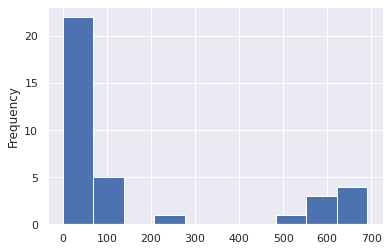

In [570]:
# Code Here (Add as many cells as you need)
#Detecting missing values
print(MV)
# Visualisation

df.isna().sum().plot.hist()
plt.show() 


#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




In [571]:
# Code Here (Add as many cells as you need) 
#Filling string missing datatype
d1 = df['UNICEF Region'].fillna('').isna().sum()
d2 = df['LDC'].fillna('').isna().sum()
d3 = df['LIFD'].fillna('').isna().sum()
d4 = df['LLDC or SIDS'].fillna('').isna().sum()
d5 = df['Severe Wasting Footnote'].fillna('').isna().sum()
d6 = df['Wasting Footnote'].fillna('').isna().sum()
d7 = df['Overweight Footnote'].fillna('').isna().sum()
d8 = df['Stunting Footnote'].fillna('').isna().sum()
d9 = df['Underweight Footnote'].fillna('').isna().sum()
#Replacing missing values using mean(), median()
r1 = df['WHZ Survey Sample (N)'].fillna(df['WHZ Survey Sample (N)'].mean()).isna().sum()
r2 = df['Severe Wasting'].fillna(df['Severe Wasting'].mean()).isna().sum()
r3 = df['Wasting'].fillna(df['Wasting'].mean()).isna().sum()
r4 = df['Overweight'].fillna(df['Overweight'].mean()).isna().sum()
r5 = df['Underweight'].fillna(df['Underweight'].mean()).isna().sum()
r6 = df['Stunting'].fillna(df['Stunting'].mean()).isna().sum()
r7 = df['WAZ Survey Sample (N)'].fillna(df['WAZ Survey Sample (N)'].mean()).isna().sum()
r8 = df['HAZ Survey Sample (N)'].fillna(df['HAZ Survey Sample (N)'].mean()).isna().sum()
r9 = df["U5 Population ('000s)"].fillna(df["U5 Population ('000s)"].mean()).isna().sum() 

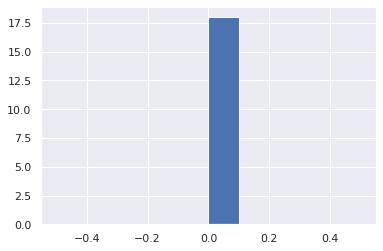

In [572]:
plt.hist([d1,d2,d3,d4,d5,d6,d7,d8,d9,r1,r2,r3,r4,r5,r6,r7,r8,r9])
plt.show() 

### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plot Heat Map

In [573]:
# Code Here (Add as many cells as you need)
correlation = df.corr()
correlation

,Year*,UNICEF Survey ID,WHO Global Database Number,WHZ Survey Sample (N),Severe Wasting,Wasting,Overweight,HAZ Survey Sample (N),Stunting,WAZ Survey Sample (N),Underweight,U5 Population ('000s)
Year*,1.000000,0.522173,0.804647,0.026988,-0.171209,-0.150473,-0.060079,0.027022,-0.250116,0.027577,-0.181362,-0.049277
UNICEF Survey ID,0.522173,1.000000,0.594224,-0.005500,-0.238902,-0.156253,-0.133641,-0.005387,-0.183075,-0.005832,-0.135359,-0.041586
WHO Global Database Number,0.804647,0.594224,1.000000,0.056817,-0.151290,-0.132825,-0.053833,0.056786,-0.229588,0.056283,-0.170220,-0.037494
WHZ Survey Sample (N),0.026988,-0.005500,0.056817,1.000000,0.028950,0.047105,-0.042685,1.000000,-0.001497,1.000000,0.027002,-0.011384
Severe Wasting,-0.171209,-0.238902,-0.151290,0.028950,1.000000,0.873986,-0.003718,0.028924,0.474958,0.028939,0.623974,0.129078
Wasting,-0.150473,-0.156253,-0.132825,0.047105,0.873986,1.000000,-0.327668,0.047097,0.580197,0.047684,0.821383,0.165658
Overweight,-0.060079,-0.133641,-0.053833,-0.042685,-0.003718,-0.327668,1.000000,-0.042681,-0.339940,-0.042741,-0.515188,-0.072081
HAZ Survey Sample (N),0.027022,-0.005387,0.056786,1.000000,0.028924,0.047097,-0.042681,1.000000,-0.001558,1.000000,0.026992,-0.011348
Stunting,-0.250116,-0.183075,-0.229588,-0.001497,0.474958,0.580197,-0.339940,-0.001558,1.000000,-0.001471,0.858483,0.126773
WAZ Survey Sample (N),0.027577,-0.005832,0.056283,1.000000,0.028939,0.047684,-0.042741,1.000000,-0.001471,1.000000,0.026490,-0.011532


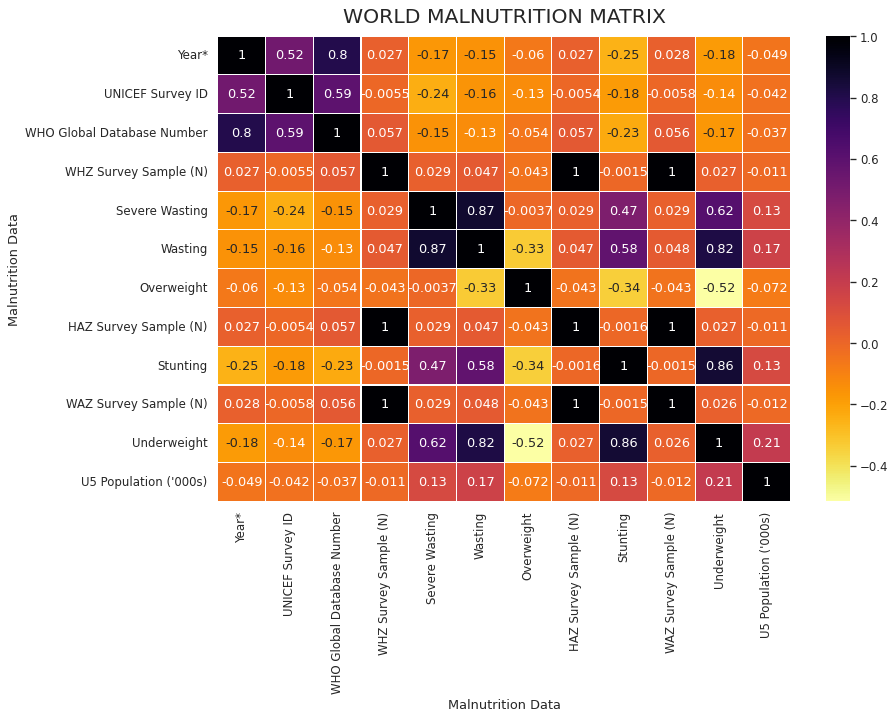

In [574]:
# Visualisation of the corralation table
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white', cmap="inferno_r", linewidths=0.1, annot=True)
plt.title('World Malnutrition Matrix'.upper(), size=19, pad=13)
plt.xlabel('Malnutrition Data')
plt.ylabel('Malnutrition Data')
plt.xticks(rotation=90)
plt.show()

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

Text(0.5, 1.0, 'Overweight vs. Underweight')

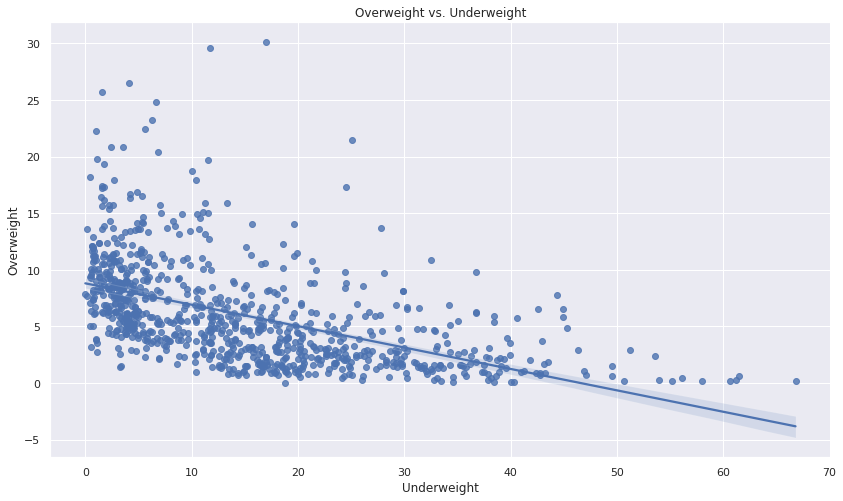

In [575]:
# Code Here (Add as many cells as you need)
plt.figure(figsize=(14,8))
sns.regplot(x=df["Underweight"], y=df["Overweight"])
plt.title('Overweight vs. Underweight')


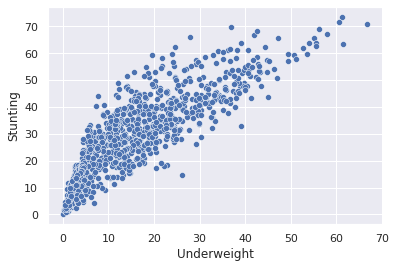

In [576]:
sns.scatterplot(data= df,x="Underweight", y="Stunting")
plt.show() 

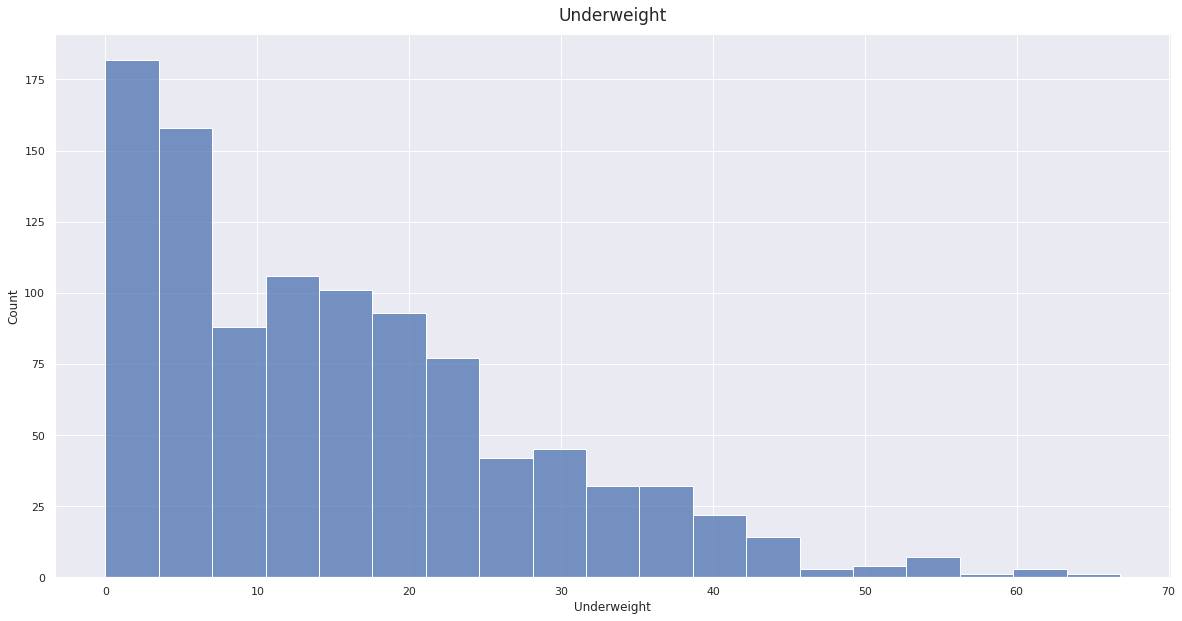

In [577]:
plt.figure(figsize=(20,10))
sns.histplot(df.Underweight)
plt.title('Underweight', size=17, pad=13)
plt.show()

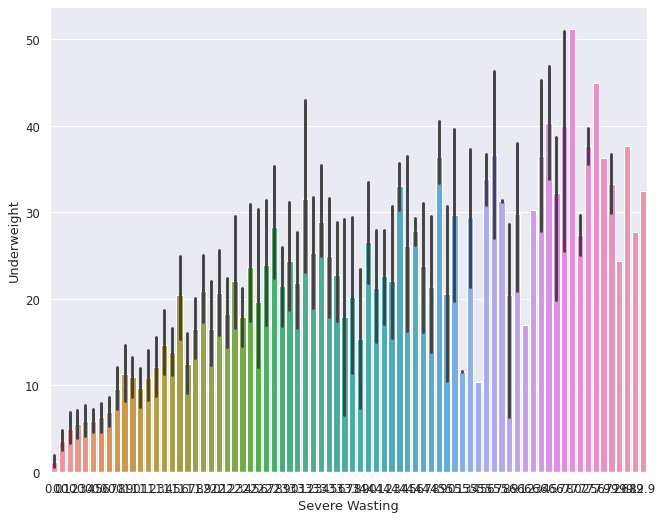

In [578]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Severe Wasting", y="Underweight", data=df)

#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



In [579]:
d3 = df['LIFD'].fillna('',inplace = True)
d4 = df['LLDC or SIDS'].fillna('',inplace = True)

In [580]:
df['LLDC or SIDS'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1029    False
1030    False
1031    False
1032    False
1033    False
Name: LLDC or SIDS, Length: 1034, dtype: bool

In [581]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df['LLDC or SIDS'].value_counts()
le = LabelEncoder()
df = df.apply(le.fit_transform)
print(df['LLDC or SIDS'].to_string())

0       1
1       1
2       1
3       1
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      1
25      1
26      1
27      1
28      1
29      0
30      0
31      0
32      0
33      1
34      1
35      1
36      1
37      1
38      1
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      2
67      0
68      0
69      2
70      2
71      2
72      2
73      0
74      0
75      0
76      0
77      0
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      0
94      0
95      0
96      1
97      1
98      1
99      0


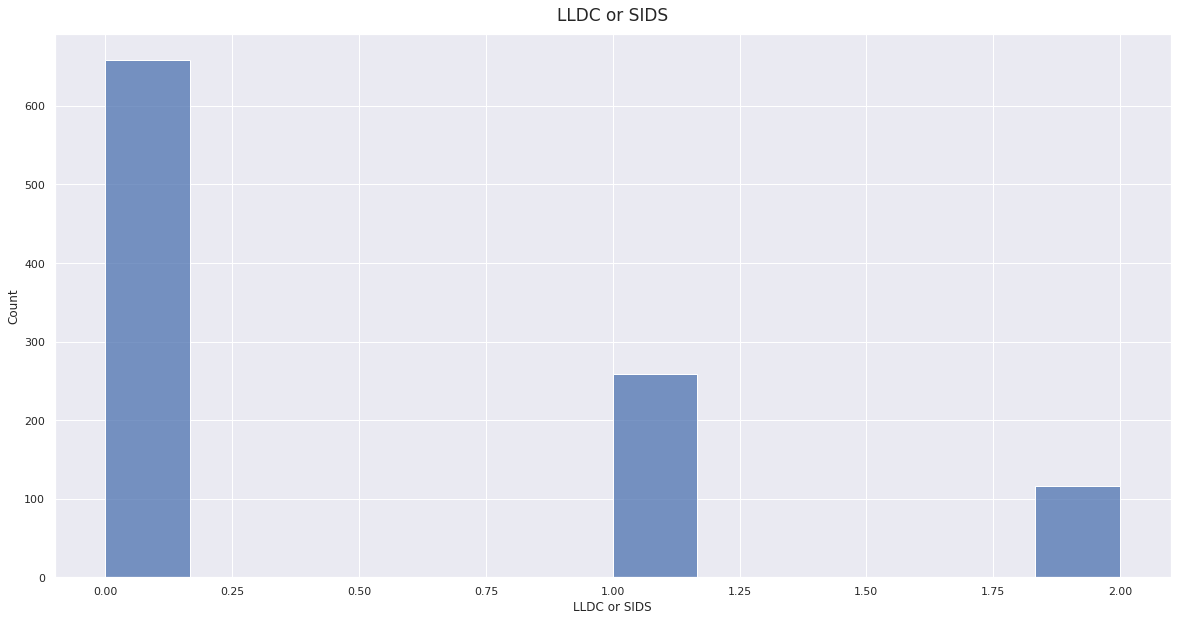

In [582]:
plt.figure(figsize=(20,10))
sns.histplot(df['LLDC or SIDS'])
plt.title('LLDC or SIDS', size=17, pad=13)
plt.show()

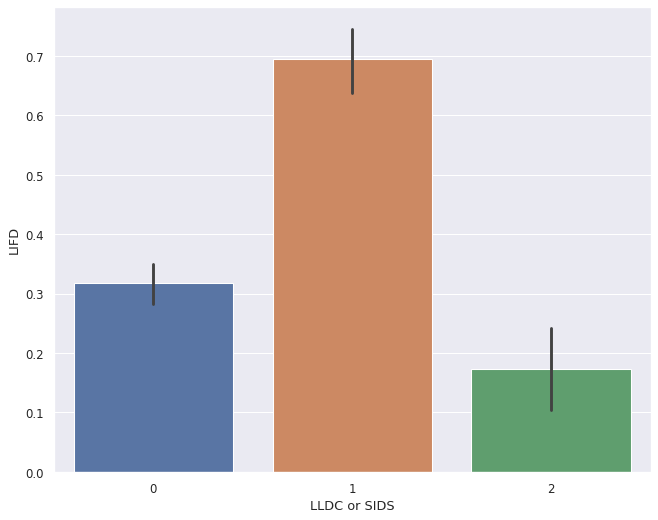

In [583]:

plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x=df['LLDC or SIDS'], y=df['LIFD'], data=df)

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

### **Explanation of data Preprocessing Step**
we have used fillna() for filling string type missing values. Used mean(). median() for filling null values. For dropping diplicates we used drop function. By applying these steps we completed our preprocessing step. 


In [584]:
# Code Here (Add as many cells as you need) 
#Filling string missing datatype
d1 = df['UNICEF Region'].fillna('',inplace = True)
d2 = df['LDC'].fillna('',inplace = True)
d3 = df['LIFD'].fillna('',inplace = True)
d4 = df['LLDC or SIDS'].fillna('',inplace = True)
d5 = df['Severe Wasting Footnote'].fillna('',inplace = True)
d6 = df['Wasting Footnote'].fillna('',inplace = True)
d7 = df['Overweight Footnote'].fillna('',inplace = True)
d8 = df['Stunting Footnote'].fillna('',inplace = True)
d9 = df['Underweight Footnote'].fillna('',inplace = True)
#Replacing missing values using mean(), median()
r1 = df['WHZ Survey Sample (N)'].fillna(df['WHZ Survey Sample (N)'].mean(),inplace = True)
r2 = df['Severe Wasting'].fillna(df['Severe Wasting'].mean(),inplace = True)
r3 = df['Wasting'].fillna(df['Wasting'].mean(),inplace = True)
r4 = df['Overweight'].fillna(df['Overweight'].mean(),inplace = True)
r5 = df['Underweight'].fillna(df['Underweight'].mean(),inplace = True)
r6 = df['Stunting'].fillna(df['Stunting'].mean(),inplace = True)
r7 = df['WAZ Survey Sample (N)'].fillna(df['WAZ Survey Sample (N)'].mean(),inplace = True)
r8 = df['HAZ Survey Sample (N)'].fillna(df['HAZ Survey Sample (N)'].mean(),inplace = True)
r9 = df["U5 Population ('000s)"].fillna(df["U5 Population ('000s)"].mean(),inplace = True) 


In [585]:
#Dropping some avoidable columns
df.drop(['UNICEF Sub-Region'], axis=1,inplace=True)
df.drop(['WHO Region'], axis=1,inplace=True) 
df.drop(['World Bank Income Classification'], axis=1,inplace=True) 
df.drop(['Fieldwork period'], axis=1,inplace=True) #description will write

In [586]:
df.to_string()

"      ISO code  Country and areas  Survey year  Year*  United Nations Region  United Nations Sub-Region  SDG Region  UNICEF Region  World Bank Region  LDC  LIFD  LLDC or SIDS  UNICEF Survey ID  WHO Global Database Number  Type of Estimate  WHZ Survey Sample (N)  Severe Wasting  Severe Wasting Footnote  Wasting  Wasting Footnote  Overweight  Overweight Footnote  HAZ Survey Sample (N)  Stunting  Stunting Footnote  WAZ Survey Sample (N)  Underweight  Underweight Footnote  Report Author  Source  Short Source  U5 Population ('000s)\n0            0                  0           32     13                      1                         17           1              4                  5    0     1             1                 0                         196                 0                    399              76                       49      167                34          65                   28                    412       423                 37                    403          350               

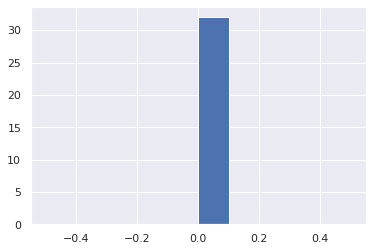

In [587]:
MV1 = df.isna().sum()
plt.hist(MV1)
plt.show() 

In [588]:
rows = len(df. axes[0])
columns = len(df. axes[1])
print('Rows: ',rows)
print('Columns: ',columns)
df.info()

Rows:  1034
Columns:  32
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ISO code                    1034 non-null   int64
 1   Country and areas           1034 non-null   int64
 2   Survey year                 1034 non-null   int64
 3   Year*                       1034 non-null   int64
 4   United Nations Region       1034 non-null   int64
 5   United Nations Sub-Region   1034 non-null   int64
 6   SDG Region                  1034 non-null   int64
 7   UNICEF Region               1034 non-null   int64
 8   World Bank Region           1034 non-null   int64
 9   LDC                         1034 non-null   int64
 10  LIFD                        1034 non-null   int64
 11  LLDC or SIDS                1034 non-null   int64
 12  UNICEF Survey ID            1034 non-null   int64
 13  WHO Global Database Number  1034 non-n

### **Write Here**

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

In [589]:
# Code Here (Add as many cells as you need) 
#Linear Regression 

x = df[['Severe Wasting','Wasting','Stunting']]
y = df[['Underweight']]
print(x,y)


      Severe Wasting  Wasting  Stunting
0                 76      167       423
1                 35       85       454
2                 40       94       335
3                 16       50       315
4                 76       80       164
...              ...      ...       ...
1029              29       71       292
1030               5       23       291
1031               8       31       266
1032               7       31       224
1033              11       32       219

[1034 rows x 3 columns]       Underweight
0             350
1             290
2             230
3             181
4              69
...           ...
1029          135
1030          113
1031           99
1032          109
1033           83

[1034 rows x 1 columns]


In [590]:
# Splitting into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3,random_state=0)
print(x_train,y_train,x_test,y_test)

     Severe Wasting  Wasting  Stunting
416               3       21        65
462               6       27        33
285              40      142       419
897              17       27        77
71               12       32       155
..              ...      ...       ...
277               4       20       106
763               5       23       364
835               7       17       106
559              25      104       199
684               2       17        35

[689 rows x 3 columns]      Underweight
416           33
462           25
285          327
897           21
71            60
..           ...
277           48
763          116
835           24
559          163
684           11

[689 rows x 1 columns]      Severe Wasting  Wasting  Stunting
643               1        9         4
315               1        5        42
894              76       71        91
316               1        9         3
425               3       24        50
..              ...      ...       ...
967    

In [591]:
#Fitting the dataset into Linear Regression Model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)   

LinearRegression()

In [592]:
# Predicting the values of the Test Set
y_pred = regressor.predict(x_test)
print(y_pred) 

[[ 2.01300223e+00]
 [ 1.46058799e+01]
 [ 7.60061782e+01]
 [ 1.59385260e+00]
 [ 3.34217529e+01]
 [ 2.22270498e+02]
 [ 2.08917696e+02]
 [ 1.73385995e+02]
 [ 3.55081950e+01]
 [ 2.71623149e+01]
 [ 1.60894256e+02]
 [ 2.47571418e+02]
 [ 1.05603394e+02]
 [ 2.17171644e+02]
 [ 8.73921763e+01]
 [ 1.44199650e+02]
 [ 6.46189979e+01]
 [ 7.21771594e+01]
 [ 6.18792153e+01]
 [ 1.09533551e+02]
 [ 9.25913554e+01]
 [ 9.06060631e+01]
 [ 1.28753277e+02]
 [ 2.22492480e+02]
 [ 1.45243518e+02]
 [ 5.71658250e+01]
 [ 1.52189637e+02]
 [ 7.02392219e+01]
 [ 1.56500783e+02]
 [ 1.59186459e+02]
 [ 2.11364730e+02]
 [ 2.03270636e+02]
 [ 2.42257566e+02]
 [ 3.38685078e+02]
 [ 2.76827146e+01]
 [ 1.08409421e+02]
 [ 2.40230083e+02]
 [ 1.35616645e+02]
 [ 2.87790267e+01]
 [ 1.65266059e+02]
 [ 1.46928664e+02]
 [ 1.28785134e+02]
 [ 2.32450621e+02]
 [ 7.30386679e+01]
 [ 2.34361989e+02]
 [ 2.17857789e+02]
 [ 2.11635441e+02]
 [ 7.28092861e+01]
 [ 1.42483964e+02]
 [ 2.39958548e+02]
 [ 1.58785529e+02]
 [ 1.76693432e+02]
 [ 1.2633171

In [593]:
#Linear regression R2 Score Accuracy
from sklearn import metrics
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

0.6562886557787693


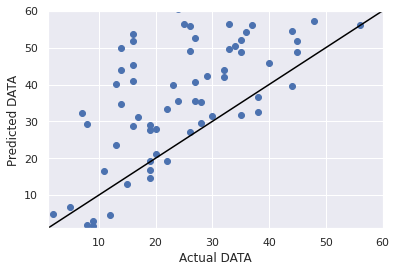

In [594]:
plt.scatter(y_test, y_pred) 
plt.xlim(1, 60)
plt.ylim(1, 60)
plt.ylabel('Predicted DATA') 
plt.xlabel('Actual DATA')
plt.plot([1, 60], [1, 60], 'black')

In [595]:
#Logistic regression 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# data1
X=df[['LDC','LIFD','LLDC or SIDS']]
Y=df['Underweight']
rr=np.array(X)
rq=np.array(Y)
rL1= LogisticRegression() 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size
= 1/3, random_state = 0)
rL1.fit(X_train, Y_train)

LogisticRegression()

In [596]:
Y_pred = rL1.predict(X_test)

In [597]:
from sklearn import metrics
r2a = metrics.r2_score(Y_test, Y_pred)
print(r2a)

-1.0734429069444835


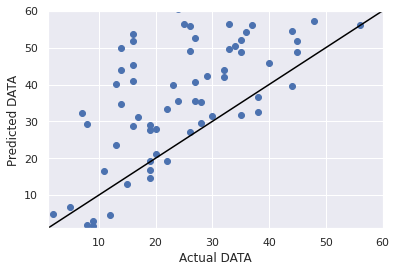

In [598]:
plt.scatter(y_test, y_pred) 
plt.xlim(1, 60)
plt.ylim(1, 60)
plt.ylabel('Predicted DATA') 
plt.xlabel('Actual DATA')
plt.plot([1, 60], [1, 60], 'black')

In [599]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB

In [600]:
df.head()

,ISO code,Country and areas,Survey year,Year*,United Nations Region,United Nations Sub-Region,SDG Region,UNICEF Region,World Bank Region,LDC,...,HAZ Survey Sample (N),Stunting,Stunting Footnote,WAZ Survey Sample (N),Underweight,Underweight Footnote,Report Author,Source,Short Source,U5 Population ('000s)
0,0,0,32,13,1,17,1,4,5,0,...,412,423,37,403,350,25,52,34,9,736
1,0,0,49,20,1,17,1,4,5,0,...,47,454,59,46,290,55,491,879,13,774
2,0,0,70,29,1,17,1,4,5,0,...,887,335,47,907,230,47,495,36,13,796
3,0,0,83,34,1,17,1,4,5,0,...,731,315,47,728,181,47,342,35,14,801
4,2,1,31,13,2,18,4,1,1,1,...,552,164,26,543,69,25,202,668,13,190


In [601]:
#RandomForest regression Model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
x = df[["Severe Wasting","Wasting","Stunting"]] 
y = df[['Underweight']]
print(x,y)


      Severe Wasting  Wasting  Stunting
0                 76      167       423
1                 35       85       454
2                 40       94       335
3                 16       50       315
4                 76       80       164
...              ...      ...       ...
1029              29       71       292
1030               5       23       291
1031               8       31       266
1032               7       31       224
1033              11       32       219

[1034 rows x 3 columns]       Underweight
0             350
1             290
2             230
3             181
4              69
...           ...
1029          135
1030          113
1031           99
1032          109
1033           83

[1034 rows x 1 columns]


In [602]:
#Splitting values into Train test data
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=1/3)
print(x_train, x_test, y_train, y_test)

     Severe Wasting  Wasting  Stunting
522              11       37       350
111              18      106       272
843              10       48        79
746               1        5        19
722               1        5       146
..              ...      ...       ...
920               9       37       281
748               2        8        13
145              47      103       369
779              30       93       244
816              76       32       233

[689 rows x 3 columns]      Severe Wasting  Wasting  Stunting
869              27       76       104
333               8       18       432
991              24       88       309
726               1        5       102
128              76       41       216
..              ...      ...       ...
656              30      124       403
466               6       23        28
450              21       68       294
398              76       60       164
733              76       87       338

[345 rows x 3 columns]      Underweight

In [603]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import utils
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

<ipython-input-603-d882d49f0721>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor()

In [604]:
#Random Forest - value prediction
y_pred = regressor.predict(x_test)
y_pred

array([ 84.31      , 182.56      , 222.3       ,  29.17      ,
        96.79      ,  28.19      , 272.73      , 114.92      ,
        22.49      , 206.05      , 275.65      , 215.35      ,
       177.2003872 ,  23.66      , 123.89      , 191.89      ,
       233.74      ,  81.69      ,  25.49      , 246.95566264,
       225.58      , 287.27      , 274.78      , 126.23      ,
       234.68      , 188.94      ,  54.71      ,  45.26      ,
        75.75      ,  95.98      , 261.97      ,  39.56      ,
       266.47      ,  45.18      ,  43.81      , 227.68      ,
       200.83      ,  23.02      ,  18.19      ,  95.16      ,
        36.48      , 228.12      , 123.96      , 191.22      ,
       168.33      ,  34.83      , 179.1       , 217.97      ,
        95.43      ,  58.22      , 102.16      ,  59.91      ,
        44.68      ,  51.46      , 235.61      ,  43.        ,
        85.43      , 162.88      ,  72.17      , 177.2003872 ,
        93.41      ,  92.77      , 131.97      , 177.20

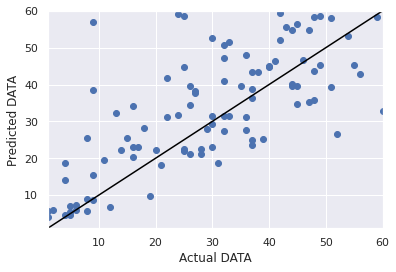

In [605]:
# For y_test data
plt.scatter(y_test, y_pred) 
plt.xlim(1, 60)
plt.ylim(1, 60)
plt.ylabel('Predicted DATA') 
plt.xlabel('Actual DATA')
plt.plot([1, 60], [1, 60], 'black')   

In [606]:
# Model Evaluation for Test Dataset

from sklearn import metrics
mae = metrics.mean_absolute_error(y_test.round(), y_pred.round())
mse = metrics.mean_squared_error(y_test.round(), y_pred.round())
r2b = metrics.r2_score(y_test.round(), y_pred.round())
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2b) 

MAE is 23.86
MSE is 1997.23
R2 score is 0.82


In [607]:
from sklearn.metrics import classification_report
print(classification_report(y_test.round(), y_pred.round())) 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         1
         4.0       0.50      0.33      0.40         3
         5.0       1.00      0.67      0.80         3
         6.0       0.25      0.50      0.33         2
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         3
         9.0       0.50      0.25      0.33         4
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         2
        16.0       0.00      0.00      0.00         3
        17.0       0.00      0.00      0.00         1
        18.0       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

[Text(0.328125, 0.9166666666666666, 'X[1] <= 2.5\ngini = 0.995\nsamples = 689\nvalue = [3, 5, 1, 7, 4, 2, 2, 1, 1, 3, 1, 2, 6, 2\n5, 4, 3, 5, 9, 4, 3, 2, 4, 5, 2, 5, 2, 2\n4, 5, 10, 4, 3, 7, 4, 4, 4, 4, 6, 5, 2, 4\n4, 3, 4, 2, 3, 2, 2, 2, 5, 1, 4, 2, 3, 1\n3, 1, 1, 3, 1, 2, 1, 3, 2, 2, 3, 3, 1, 2\n1, 1, 3, 1, 1, 2, 1, 1, 2, 2, 4, 2, 3, 1\n2, 1, 2, 3, 3, 1, 1, 2, 3, 5, 2, 3, 2, 1\n3, 2, 2, 3, 3, 1, 7, 7, 2, 1, 1, 1, 1, 2\n2, 3, 5, 1, 1, 1, 2, 1, 5, 2, 2, 1, 3, 3\n1, 4, 1, 3, 2, 1, 3, 3, 1, 3, 2, 2, 1, 3\n2, 2, 1, 3, 3, 4, 4, 4, 2, 4, 2, 1, 4, 2\n2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1\n3, 3, 3, 2, 1, 1, 2, 2, 1, 1, 2, 3, 1, 4\n2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1\n2, 1, 1, 2, 1, 5, 1, 3, 1, 1, 1, 2, 1, 1\n1, 3, 3, 1, 5, 2, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1\n2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1\n3, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1\n1, 4, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1\n1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

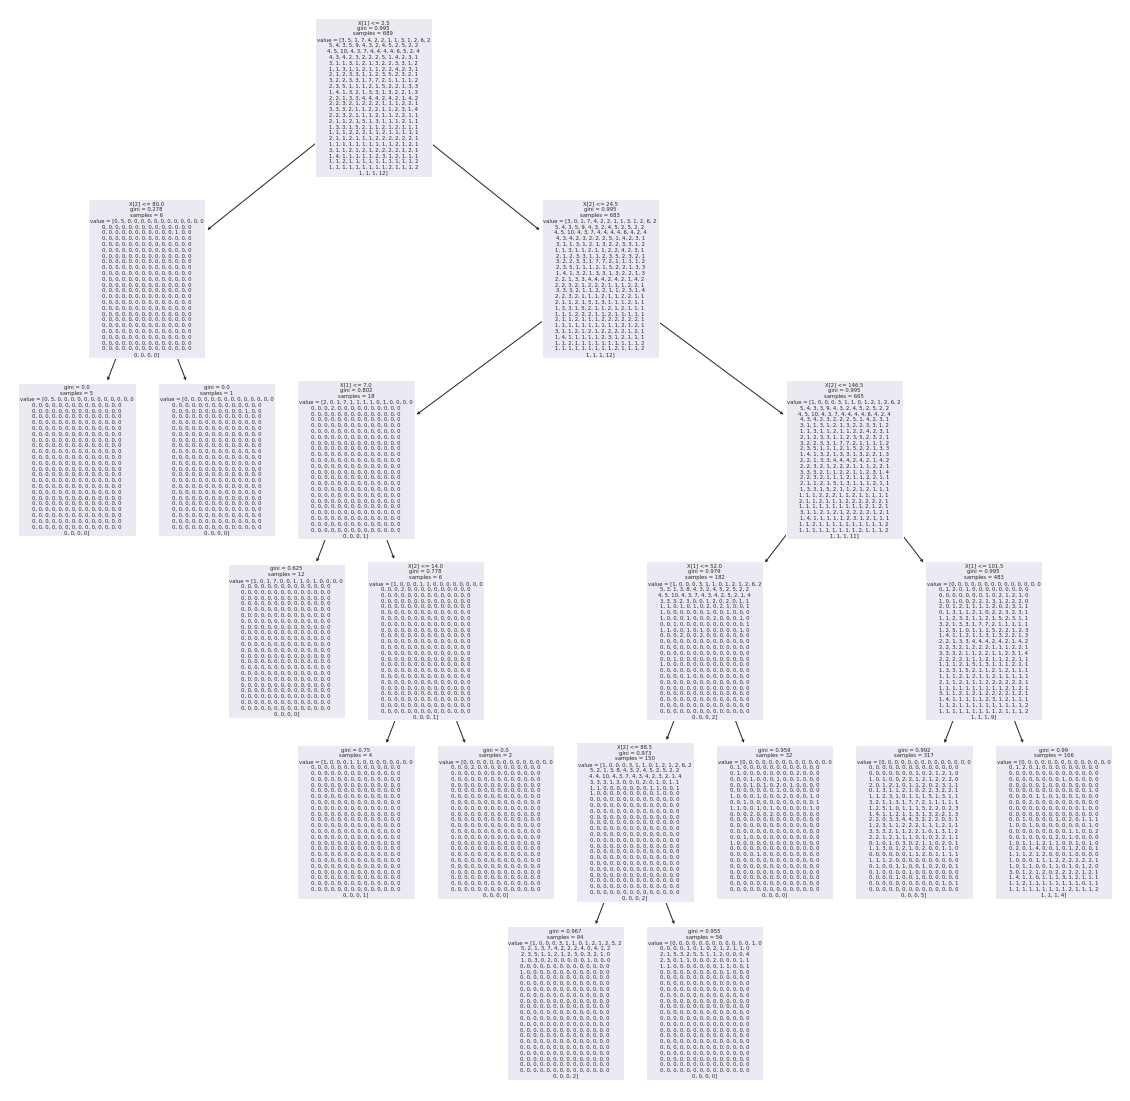

In [608]:
#Decision tree 
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
l1 = preprocessing.LabelEncoder()
dtree = DecisionTreeClassifier(max_leaf_nodes = 10,random_state=0)
dtree = dtree.fit(x_train.round(),y_train.round()) 
plt.figure(figsize=(20,20))
tree.plot_tree(dtree) 

In [609]:
from sklearn import metrics
r2c = metrics.r2_score(y_test.round(), y_pred.round())
print(r2c*100,'%') 

82.28289725275289 %


### **Write Here**
In this phase, we have applied 4 Machine Learning Models. Linear Regression, Logistic regression, Random Forest and Decision Tree. 
In Linear regression, for 'y' we have choosed Underweight. For Underweight we found that there is a good relationship between Underweight and 'Severe Wasting', 'Wasting' and 'Stunting'. So we choosed this three for 'x'. After applying Machine Learning Models we found accuracy of our models. Those are given below-
Linear Regression - Accuracy 88%
Logistic Regression - Accuracy 46%
Linear Regression - Accuracy 5%
Linear Regression - Accuracy 21%


## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models. (Add as many cells as you need)

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

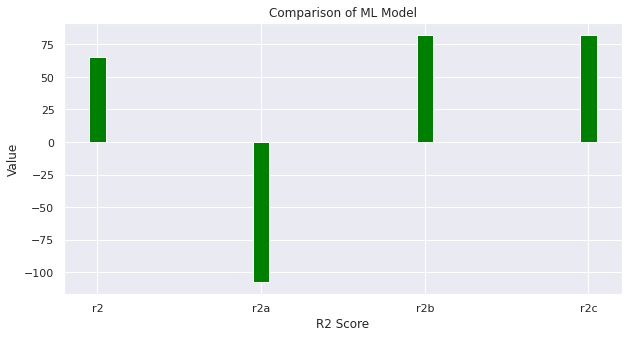

In [610]:
# Code Here (Add as many cells as you need) 
d1 = {'r2':r2*100, 'r2a':r2a*100, 'r2b':r2b*100, 'r2c':r2c*100}
m1 = list(d1.keys())
m2 = list(d1.values())
fig = plt.figure(figsize = (10,5))
plt.bar(m1, m2, color ='green',width = 0.1)
plt.xlabel("R2 Score")
plt.ylabel("Value")
plt.title("Comparison of ML Model")
plt.show()


### **Write Here**
After applying 4 models, we have got R squared values. R-squared is a  measure that represents the goodness of fit of a regression model. In our Linear model we got r2 score which is 0.82 so we can say that it is a good predictive value. Random forest(0.83) and Decision Tree(0.82) we got the same closest values. But by applying Logistic regression, we got very bad r2 score so it can be said that this model is not good fitted for our dataset. Because, for our target column(y) we have chosen 'Underweight' column and the values of this column is numerical. for logistic we need categorical values for classification. But our dataset has numeric values where relationships between our target column and categorical columns very poor. So we got very bad accuracy for our dataset. 
But for Linear Regression, Our target column is Numeric and x_train values are numeric too. and relationship between them are good enough which we got to know applying correlation method. And the R2_score we got is 0.82. which is a good result. 